# COGS 108 - Final Project Group 065
## Case study on fast food restaraurants and obesity rate in the U.S.

[Project Video](https://youtu.be/j4ahmlXj3WE)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [x] YES - make available
* [  ] NO - keep private

# Overview

Fast-food restaurants are ubiquitious in today's world. The more access to fast-food restaurants result to higher fast food consumption. In our case study, we are looking to see if there is a positive correlation between obesity rate and the number of fast food accross each states in the U.S. In order to come up with a result, we look at the top 5 states with the most and least fast-food restaurants and compare their obesity rate. We use choropleth as our visualizations to show the number of fast-food restaurants and obesity rate in the U.S. The darker the color in certain state, the higher the number/density of fast-food restaurants and/or obesity rate in those states. Furthermore, we used the Linear Regression summary to see and conclude the correlation between fast-food restaurants and obesity in U.S. states. 

# Names

- Them Dang
- Thanh Bui
- Ruthvicsai Sivakimar
- Noah Simpson
- Alexis Cortes

<a id='research_question'></a>
# Research Question

Is there a relationship between obesity rate and number of fast food restaurants across states in the U.S.?

<a id='background'></a>

## Background & Prior Work

Fast-food restaurants are ubiquitous in today’s world. Excessive access to fast-food restaurants is associated with more fast-food consumption. Fast foods contain extremely high energy density, which is positively related to obesity weight gain. In 2016, more than 30% of adults and 18% of children reported having obesity [4]. Obesity can lead to other health problems, especially in childhood. According to the World Health Organization (WHO) [1], at least 2.8 million people die from complications due to obesity, globally, each year. We want to know to what extent fast food and its prevalence plays a role.

A study [2] on fast food consumption and obesity in the two largest universities in Qom, the center of Iran, took place to study the relationships between different types of fast food and obesity. It was found that the consumption of sandwiches, fried chicken, and pizza were associated with obesity based on the BMI results. Fried food and hotdogs are two commonly eaten fast foods that have been associated with the risk of weight gain. The study also found that general obesity is more common or higher in females compared to males.

With the relationship fast food in itself has with obesity established, we are also interested if the number of fast food restaurants in a certain area also plays a factor with rates of obesity. We believe that the number of fast food restaurants in an area has a positive correlation with the rates of obesity in that given area.

A study [5] on fast food and obesity in the United Kingdom looks at the relation between fast food consumption and obesity level, with a focus on children aged 13-15. The study shows that higher consumption of fast food results in higher BMI (Body Mass Index), body fat percentage, and “increased the odds of being obese.” However, the study reveals, “...the accessibility of outlets and consumptions” varies over space. We want to further explore how the accessibility and abundance of fast food restaurants affects rates of obesity.


References:
 1. [Obesity](https://www.who.int/news-room/facts-in-pictures/detail/6-facts-on-obesity)
 2. [Fast food consumption and overweight/obesity prevalence in students and its association with general and abdominal obesity](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6196377/)
 3. [The relationship between obesity and the prevalence of fast food restaurants: state-level analysis](https://pubmed.ncbi.nlm.nih.gov/15559714/)
 4. [Fast-food restaurant, unhealthy eating, and childhood obesity: A systematic review and meta-analysis](https://doi.org/10.1111/obr.12944)
 5. [Fast food and obesity: a spatial analysis in a large United Kingdom population of children aged 13-15](https://pubmed.ncbi.nlm.nih.gov/22516506/)

# Hypothesis


We will look at top 5 states with the most and least number of fast food restaurants and compare their obesity level. <br>
Similar to the old hypothesis, we still believe that areas with higher volumne of fast food restaurants will have a higher rates of obesity compared to the areas with lower volumes of fast food restaurants. People nowaday are very busy, have little time to cook at home. Since the higher volumes of fast food restaurants can result to easy access to low-medium price food, hence people will more likely to buy outside food and either eat indoor or togo their food home. On the other hand, Obese people may eat more fastfood, which could also result in more fast-food restaurants in the area due to higher demand. 

# Dataset(s)

- **Dataset Name:** us_obesity.csv
- **Link to the dataset:** [Obesity Dataset](https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7/data)
- **Number of observation:** 80929 <br>
**Description:** <br>
This dataset contains data from 2011-2020 with multiple classes, including *Physical Activity, Obesity, and Fruits and Vegetables*. However, we are looking at the Obesity in each state, so we will need to do some data cleaning here. 

- **Dataset Name:** Fast_Food_Restaurant_US.csv
- **Link to the dataset:** [U.S. Fast Food Restaurants Dataset](https://www.kaggle.com/khushishahh/fast-food-restaurants-across-us?select=Fast_Food_Restaurants_US.csv)
- **Number of observation:** 10000 <br>
**Description:** <br>
This dataset consists of many different fast food restaurants around the U.S. We can use this dataset to filter by states, look at the top 5 states with the most and least number of fast food restaurants. Then compare the different obesity level of those states. <br>
*We think this dataset can be combine with us_obesity.csv dataset to find the relation between different states and their obesity level.*

- **Dataset Name:** 2019_census_population_state.csv
- **Link to the dataset:** [U.S. 2019 Census Population Dataset](https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state)
- **Number of observation:** 51 <br>
**Description:** <br>
This dataset contains the population estimate and capital location of all states in the US up to 2019. <br>

We will combine all three datasets into one final dataframe to create visuals and do prediction. All the datasets will be catagorized by states. The top 5 states with the most and least and most number of Fast Food Restaurants will be extracted and all the three datasets corresponding to those states will be combined into one dataset. The raw values in the datasets will be used as well as calulated values such as per capita. 

# Setup

In [1]:
# import pandas & numpy library
import numpy as np
import pandas as pd

# import plotly for visualization 
import plotly.express as px
import seaborn as sns
sns.set(font_scale=1.5, style="white")

# Statmodels & patsy
import patsy
import statsmodels.api as sm

## Read CSV and look at the content inside

### Fast Food Restaurants in U.S. Dataset

In [2]:
us_fastFood_df = pd.read_csv("Dataset\Fast_Food_Restaurants_US.csv")
us_fastFood_df.head(5)

,Unnamed: 0,address,categories,city,country,latitude,longitude,name,postalCode,province,websites
0,0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,https://locations.sonicdrivein.com/la/thibodau...
1,1,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,https://locations.sonicdrivein.com/la/thibodau...
2,2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN,"http://www.tacobell.com,https://locations.taco..."
3,3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN,"http://www.arbys.com,https://locations.arbys.c..."
4,4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA,http://www.steaknshake.com/locations/23851-ste...


### Obesity Level in the U.S. Dataset

In [3]:
us_obesity_df = pd.read_csv("Dataset/us_obesity.csv")
us_obesity_df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
1,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
3,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
4,2015,2015,GU,Guam,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(13.444304, 144.793731)",PA,PA1,Q044,VALUE,66,Race/Ethnicity,Hispanic,RACE,RACEHIS


### U.S. 2019 Population

In [4]:
population_df = pd.read_csv("Dataset/2019_census_population_state.csv")
population_df.head(5)

,State Abbr,STATE,POPESTIMATE2019,lat,long
0,AL,Alabama,4903185,32.377716,-86.300568
1,AK,Alaska,731545,58.301598,-134.420212
2,AZ,Arizona,7278717,33.448143,-112.096962
3,AR,Arkansas,3017804,34.746613,-92.288986
4,CA,California,39512223,38.576668,-121.493629


# Data Cleaning

### Cleaning: US Fast Food Restaurants dataset
For the fast food dataset, a few things were done. First, irrelevant columns were dropped from the dataset such as the date they were added/updated, the country (all US), the category  column (all values are fast food), as well as the website url and some other extraneous columns. Then, The categories column (what type of restaurant, what food they sell etc.), was split into a list. Some names were different and needed to be normalized, such as SUBWAY and subway, so that was done as well. There are also no null values in the food dataset.

In [5]:
def name_normalizer(name):
    name = name.lower().strip()
    name = name.replace("'", "")
    name = name.replace(".", "")
    name = name.replace( "-", " ")
    return name  
us_fastFood_df = us_fastFood_df.drop(columns = ['Unnamed: 0', 'websites', 'country', 'postalCode', 'categories'])
us_fastFood_df.name = us_fastFood_df.name.apply(name_normalizer)
us_fastFood_df = us_fastFood_df.drop_duplicates()
us_fastFood_df.head()

,address,city,latitude,longitude,name,province
0,800 N Canal Blvd,Thibodaux,29.814697,-90.814742,sonic drive in,LA
2,206 Wears Valley Rd,Pigeon Forge,35.803788,-83.580553,taco bell,TN
3,3652 Parkway,Pigeon Forge,35.782339,-83.551408,arbys,TN
4,2118 Mt Zion Parkway,Morrow,33.562738,-84.321143,steak n shake,GA
5,9768 Grand River Ave,Detroit,42.368823,-83.138251,wendys,MI


We will only keep these columns: <br>
city, name, province <br>
Since this dataset is about fast food restaurants in US, we obviously don't need the *country and categories* column. <br>
Moreover, the address, postalCode, latitude, longitude, and websites are not necessary because we can filter by states. 

In [6]:
us_fastFood_df = us_fastFood_df.drop(['address','latitude','longitude'], axis='columns')
us_fastFood_df = us_fastFood_df.rename(columns={'city':'US city', 'name': 'restaurant name', 'province': 'US province'})

*Checking dataset shape*

In [7]:
us_fastFood_df.shape

(9343, 3)

In [8]:
us_fastFood_df.head(5)

,US city,restaurant name,US province
0,Thibodaux,sonic drive in,LA
2,Pigeon Forge,taco bell,TN
3,Pigeon Forge,arbys,TN
4,Morrow,steak n shake,GA
5,Detroit,wendys,MI


#### We want to create a new dataset for Number of Fast Food Restaurants per State

In [9]:
us_ffr_per_state = pd.DataFrame(us_fastFood_df[['US province', 'restaurant name']].value_counts().groupby(['US province']).sum())
us_ffr_per_state.columns = ['no. fast food restaurants']
us_ffr_per_state = us_ffr_per_state.reset_index()

In [10]:
us_ffr_per_state.head(8)

,US province,no. fast food restaurants
0,AK,14
1,AL,6
2,AR,91
3,AZ,296
4,CA,1122
5,CO,137
6,CT,52
7,DE,39


## Clean: U.S. Obesity Dataset

In [11]:
# We are interested in data that starts and end from the same year, and fortunately, all the data start and end in the same year
# Count the number of data that start and end in different years.
us_obesity_df[us_obesity_df['YearStart'] != us_obesity_df['YearEnd']].value_counts().sum() == 0

True

The **Obesity Dataset** consists of many records from the same states. But we are only interested in the average of the whole state

In [12]:
us_obesity_df = us_obesity_df[us_obesity_df['Total'] == 'Total']

In [13]:
# Change the column YearEnd to Year
# Also, we only want the obesity rate
us_obesity_df = us_obesity_df.rename(columns={'YearEnd': 'Year'})
us_obesity_df = us_obesity_df[us_obesity_df['Topic'] == 'Obesity / Weight Status']

There are two types of questions: <br>
1. Percent of adults aged 18 years and older who have obesity
2. Percent of adults aged 18 years older who have an overweight classification <br>
We'll be working on the first time snce we only care where one has obesity or not. 

In [14]:
us_obesity_df = us_obesity_df[us_obesity_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

Now, we'll drop all other unnecessary columns.

In [15]:
# StartYear and EndYear are the same, and there are 
us_obesity_df = us_obesity_df.drop(['Topic','Low_Confidence_Limit', 'High_Confidence_Limit ', 'Datasource','YearStart', 'Class', 'Data_Value_Unit', 'Data_Value_Type','Data_Value_Footnote_Symbol',
                                    'Data_Value_Footnote', 'Total', 'Education', 'Income', 'GeoLocation',
                                    'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID','StratificationCategory1', 
                                    'Stratification1', 'StratificationID1', 'StratificationCategoryId1', 'LocationID', 
                                    'Sample_Size', 'Age(years)','Gender', 'Race/Ethnicity',
                                    'Data_Value_Alt', 'Question'], axis='columns')

Now we want to check the shape to know how much data we have left. 

In [16]:
us_obesity_df.shape

(537, 4)

In [17]:
# Looking at the content inside after cleaning
us_obesity_df.head(10)

,Year,LocationAbbr,LocationDesc,Data_Value
29,2015,PR,Puerto Rico,29.5
50,2016,NM,New Mexico,28.3
87,2016,NH,New Hampshire,26.6
170,2016,MT,Montana,25.5
416,2018,AK,Alaska,29.5
546,2018,MD,Maryland,30.9
616,2018,VA,Virginia,30.4
848,2018,GU,Guam,29.8
897,2018,OK,Oklahoma,34.8
973,2014,US,National,28.9


We only want to work with 50 states  in the U.S. <br>
1. We'll check the number of unique variable in `LocationDesc` column (make sure we have 50 states)
2. If for some reason, we have more than 50 states, we'll look through our unique values in `LocationDesc` column and drop the ones that are not one of the U.S. states

In [18]:
len(us_obesity_df['LocationDesc'].unique())

55

So here, we can see that we have 5 extra unique values, so now we want to check out our unique values in `LocationDesc` column and drop the ones that are not one of the U.S. states.

In [19]:
us_obesity_df['LocationDesc'].unique()

array(['Puerto Rico', 'New Mexico', 'New Hampshire', 'Montana', 'Alaska',
       'Maryland', 'Virginia', 'Guam', 'Oklahoma', 'National', 'Florida',
       'Oregon', 'Washington', 'Pennsylvania', 'California', 'New York',
       'Minnesota', 'South Dakota', 'Kansas', 'Virgin Islands', 'Vermont',
       'Arizona', 'Kentucky', 'Illinois', 'Wyoming',
       'District of Columbia', 'Ohio', 'Tennessee', 'Delaware', 'Idaho',
       'Michigan', 'Hawaii', 'Nebraska', 'Louisiana', 'North Dakota',
       'Missouri', 'Rhode Island', 'Wisconsin', 'Indiana', 'Arkansas',
       'Massachusetts', 'New Jersey', 'Connecticut', 'Nevada', 'Texas',
       'Maine', 'South Carolina', 'Iowa', 'North Carolina',
       'West Virginia', 'Georgia', 'Colorado', 'Mississippi', 'Utah',
       'Alabama'], dtype=object)

In [20]:
# remove 'National', 'Puerto Rico', 'Guam','District of Columbia' and 'Virgin Islands'
us_obesity_df = us_obesity_df[~us_obesity_df['LocationDesc'].isin(['National','Puerto Rico', 'Guam','District of Columbia','Virgin Islands'])]
# reset index
us_obesity_df = us_obesity_df.reset_index()
us_obesity_df = us_obesity_df.drop(['index'],  axis='columns')
us_obesity_df.head()

,Year,LocationAbbr,LocationDesc,Data_Value
0,2016,NM,New Mexico,28.3
1,2016,NH,New Hampshire,26.6
2,2016,MT,Montana,25.5
3,2018,AK,Alaska,29.5
4,2018,MD,Maryland,30.9


Let's check our `LocationDesc` unique length again to make sure. 

In [21]:
len(us_obesity_df['LocationDesc'].unique())

50

Now we want to see how many years are in our data set and see if there are any missing data for certain year. 

In [22]:
years = np.sort(us_obesity_df['Year'].unique())
print("Year: ", years)
print("Total:", len(years))

Year:  [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Total: 10


In [23]:
for i in range (2011, 2021):
    if us_obesity_df[us_obesity_df['Year'] == i].value_counts().sum() == 50:
        print(i)

2011
2012
2013
2014
2015
2016
2017
2018
2020


Looks like we have missing data for 2019. <br>
Code below will show us that we have missing data for **New Jersey** in 2019

In [24]:
'New Jersey' in us_obesity_df[us_obesity_df['Year'] == 2019]['LocationDesc'].unique()

False

In [25]:
# Rename columns so it's easier to read and understand
us_obesity_df.columns = ['Year','StateAbbr','State','Percentage']

In [26]:
# Sort data by Year and StateAbbr
us_obesity_df = us_obesity_df.sort_values(by=['Year', 'StateAbbr'])
us_obesity_df = us_obesity_df.reset_index().drop(['index'], axis='columns')

# We only have data fast food restaurants to 2019, so we only select this year
us_obesity_df = us_obesity_df[us_obesity_df['Year'] == 2019].reset_index().drop(['index'], axis=1)

Let's have a look at the **Obesity Dataset** after cleaning

In [27]:
us_obesity_df.shape

(49, 4)

In [28]:
us_obesity_df.head(5)

,Year,StateAbbr,State,Percentage
0,2019,AK,Alaska,30.5
1,2019,AL,Alabama,36.1
2,2019,AR,Arkansas,37.4
3,2019,AZ,Arizona,31.4
4,2019,CA,California,26.2


## Clean: 2019 Census Population Dataset
We will rename the poplation column to make it easier to read. <br>
We will drop longitude and laditude columns since we can filter by states. <br>
We will check if there are any null value in the dataset and drop them. <br>

In [29]:
# Drop columns
population_df = population_df.drop(['STATE', 'lat', 'long'], axis='columns')
# Rename columns
population_df = population_df.rename(columns={'State Abbr': 'US Province', 'POPESTIMATE2019':'2019 Population'})

In [30]:
population_df.isnull().sum()

US Province        1
2019 Population    0
dtype: int64

Since we only have 1 **null item**, we can just use `dropna` 

In [31]:
population_df = population_df.dropna(subset='US Province')
population_df.isnull().sum()

US Province        0
2019 Population    0
dtype: int64

# Data Analysis & Results

### Combine 2019 Population with U.S. Fast Food Restaurant per State Dataset

In [32]:
# Sort states alphabetically
us_ffr_per_state = us_ffr_per_state.sort_values(by=['US province'])
population_df = population_df.sort_values('US Province').reset_index().drop(['index'], axis='columns')
us_ffr_per_state['2019 Population'] = population_df['2019 Population']
us_ffr_per_state.columns = ["StatesAbbr", "no. fast food restaurants", "Population"]
us_ffr_per_state.head(5)

,StatesAbbr,no. fast food restaurants,Population
0,AK,14,731545
1,AL,6,4903185
2,AR,91,3017804
3,AZ,296,7278717
4,CA,1122,39512223


#### Combine Obesity Level by State with U.S. Fast Food Restaurants per State

In [33]:
# Join all the data frames
df = pd.concat([us_ffr_per_state, us_obesity_df], axis=1, join='inner')
df = df.drop(['Year','StateAbbr', 'State'], axis=1)
df.columns = ['StateAbbr', 'Restaurants', 'Population', 'Obesity']
df.head(5)

,StateAbbr,Restaurants,Population,Obesity
0,AK,14,731545,30.5
1,AL,6,4903185,36.1
2,AR,91,3017804,37.4
3,AZ,296,7278717,31.4
4,CA,1122,39512223,26.2


Now, we will be obtaining the values in the fast food restaurant dataset for the states with the top 5 most and 5 least amount of restaurants. On top of that, the top 5 most and least restaurants per 10,000 residents will also be obtained, to see if the results are different. <br> <br>
States with the top 5 most and least amount of fast food restaurants. <br>

In [34]:
df = df.sort_values(by='Restaurants', ascending=False).reset_index(drop=True)
most_ffr_df = df[:5]
least_ffr_df = df[-5:]

5 states with most amount of fast food restaurants

In [35]:
most_ffr_df

,StateAbbr,Restaurants,Population,Obesity
0,CA,1122,39512223,26.2
1,TX,753,28995881,29.2
2,FL,575,21477737,27.0
3,OH,503,11689100,36.8
4,GA,392,10617423,33.1


5 states with least amount of fast food restaurants

In [36]:
least_ffr_df

,StateAbbr,Restaurants,Population,Obesity
44,ME,24,1344212,31.7
45,AK,14,731545,30.5
46,RI,13,1059361,35.4
47,VT,13,623989,28.3
48,AL,6,4903185,36.1


From the datasets above, we can see that <br>
- States with the most fast food restaurants: CA, TX, FL, OH, GA <br>
- States with the least fast food restaurants: AL, VT, RI, AK, ME <br>

Top 5 most and least fast food restaurants per 10,000 residents will also be obtained, to see if the results are different. 

In [37]:
df['ffr_pc'] = (df['Restaurants']/df['Population']) * 10000

df = df.sort_values(by='ffr_pc', ascending=False).reset_index(drop=True)
most_ffr_pc = df[:5]
least_ffr_pc = df[-5:]

5 states with most fast food restaurant per 10,000 residents

In [38]:
most_ffr_pc

,StateAbbr,Restaurants,Population,Obesity,ffr_pc
0,SD,40,884659,36.5,0.452152
1,ND,34,762062,34.8,0.446158
2,NE,85,1934408,34.1,0.439411
3,OH,503,11689100,36.8,0.430315
4,LA,194,4648794,35.9,0.417313


5 states with least fast food restaurant per 10,000 residents

In [39]:
least_ffr_pc

,StateAbbr,Restaurants,Population,Obesity,ffr_pc
44,NY,328,19453561,34.8,0.168607
45,CT,52,3565287,29.1,0.145851
46,NJ,121,8882190,31.7,0.136228
47,RI,13,1059361,35.4,0.122715
48,AL,6,4903185,36.1,0.012237


From the dataset above, we can see that <br>
- States with the most fast food restaurants per 10,000 residents: SD, ND, AZ, DE, NE <br>
- States with the least fast food restaurants per 10,000 residents: AL, RI, NJ, CT, NY

## Data Visualization

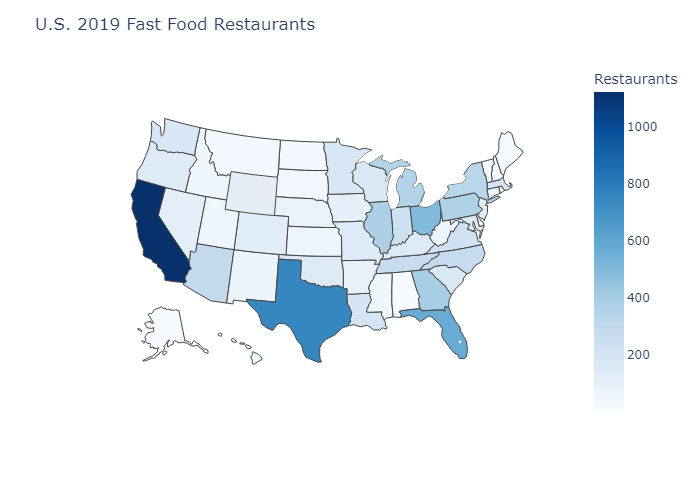

In [60]:
# Plot Fast Food Restaurants in U.S. in 2019
fig = px.choropleth(df, locations='StateAbbr', 
                    locationmode="USA-states", 
                    color='Restaurants', 
                    scope="usa", 
                    color_continuous_scale="blues")
fig.update_layout(title_text='U.S. 2019 Fast Food Restaurants')
fig.show("png")

In [42]:
df.sort_values(by='Restaurants', ascending=False).head(5)

,StateAbbr,Restaurants,Population,Obesity,ffr_pc
25,CA,1122,39512223,26.2,0.283963
32,TX,753,28995881,29.2,0.259692
30,FL,575,21477737,27.0,0.267719
3,OH,503,11689100,36.8,0.430315
10,GA,392,10617423,33.1,0.369204


As you can see here, from our visual and table above. <br>
The darker the color, the most fast-food restaurants are in the states. <br>
**California** has the darkest color in our graph by **Texas, Florida, etc**.<br>
This is correlates with our table sorting by `Restaurants`. 

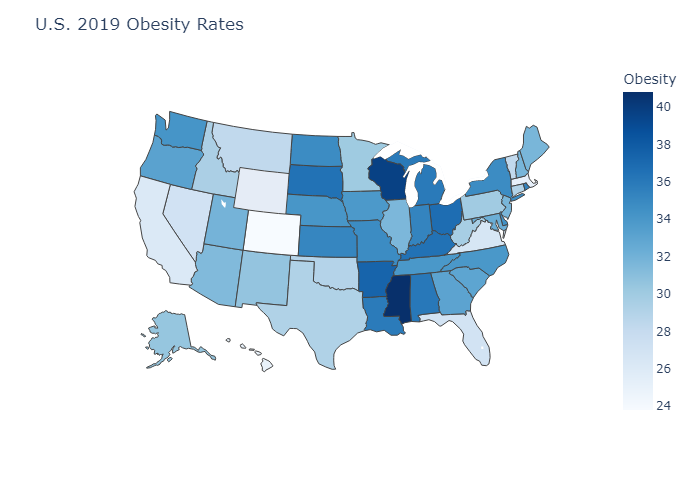

In [61]:
# Plot Obesity Rate in U.S. in 2019
fig = px.choropleth(df, 
                    locations='StateAbbr', 
                    locationmode="USA-states", 
                    color='Obesity', 
                    color_continuous_scale="Blues", 
                    scope="usa")
fig.update_layout(title_text='U.S. 2019 Obesity Rates')
fig.show('png')

In [43]:
df.sort_values(by='Obesity', ascending=False).head(5)

,StateAbbr,Restaurants,Population,Obesity,ffr_pc
43,MS,52,2976149,40.8,0.174722
21,WI,176,5822434,39.7,0.302279
22,AR,91,3017804,37.4,0.301544
3,OH,503,11689100,36.8,0.430315
0,SD,40,884659,36.5,0.452152


As you can see here, from our visual and table above. <br>
The darker the color, the most higher the obesity rate in the states. <br>
**Mississippi** has the darkest color in our graph follow by **Wisconsin, Arkansas, etc**.<br>
This is correlates with our table sorting by `Obesity`. 

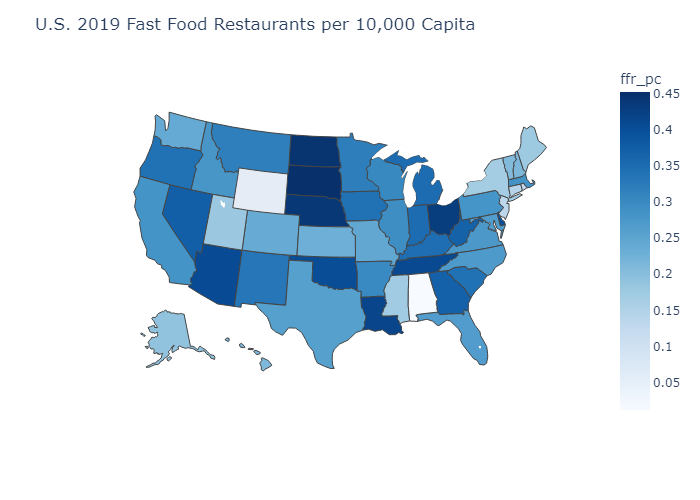

In [62]:
# Plot Fast Food Restarants per 10,000 capita in U.S. in 2019
fig = px.choropleth(df, 
                    locations='StateAbbr', 
                    locationmode="USA-states", 
                    color='ffr_pc', 
                    color_continuous_scale="Blues", 
                    scope="usa")
fig.update_layout(title_text='U.S. 2019 Fast Food Restaurants per 10,000 Capita')
fig.show('png')

In [44]:
df.sort_values(by='ffr_pc', ascending=False).head(5)

,StateAbbr,Restaurants,Population,Obesity,ffr_pc
0,SD,40,884659,36.5,0.452152
1,ND,34,762062,34.8,0.446158
2,NE,85,1934408,34.1,0.439411
3,OH,503,11689100,36.8,0.430315
4,LA,194,4648794,35.9,0.417313


As you can see here, from our visual and table above. <br>
The darker the color, the most higher the obesity rate in the states. <br>
**South Dakora** and **North Dakota** are the two states with the highest fast-food restaurant per 10,000 capita follow by other states.<br>
This is correlates with our table sorting by `ffr_pc`. 

**Our goal is to look for the relationship between the amount of fast food restaurants and the obesity rates**

Here, we want to use the the scatter plot, and plot the relationship between two variables with a line. <br>
This should help us see the correlation between the two variables better. <br>
1. If the slope is negative, then we have a negative correlation
2. If the slope is positive, then we have a positive correlation
3. If the line is a bit flat, then the relationship between the two variables are not significant

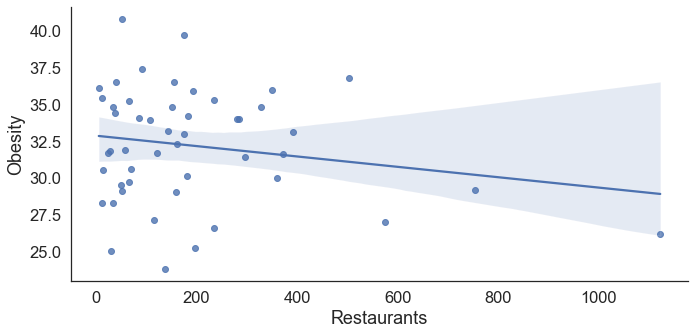

In [63]:
plot_ffr_obese = sns.lmplot(x='Restaurants', y='Obesity', data=df, aspect=2)

From looking at this line graph, we can see that there is a negative correlation between two variables since the slope of the line is negative. <br>
- Though, a lot of our variables are on the left side of the graph, hence our prediction will not be accurate. 
- This might leads to the correlation between the two are not significant. <br>

Moreover, the percentage of obesity is might be affected by the population of the state. <br>
Therefore, we compare the amount of fast food restaurants per 10,000 resident and the percentage of obesity below. <br>

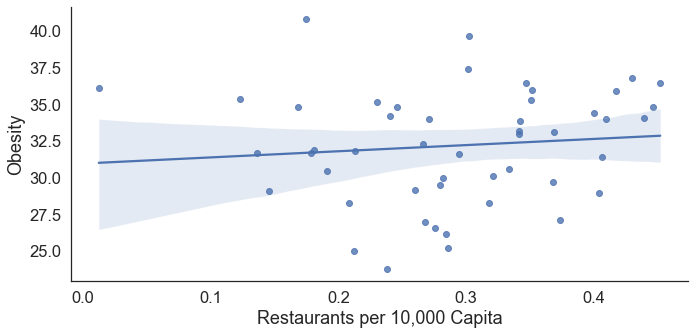

In [64]:
plot_ffr_pc_obese = sns.lmplot(x='ffr_pc', y='Obesity', data=df, aspect=2)
plot_ffr_pc_obese.set(xlabel='Restaurants per 10,000 Capita')

As we can see here, the regression line is a bit positive but almost flat for this graph. <br>
- This implies that the relationship between obesity rate and restaurant per 10,000 capita is not significant. 
- The scatter points are distributed more equally this time. Thus, our prediction would be a bit more accurate compared to abovev. 

With this in mind, let's see if our predictions from looking at the line graphs are correct by looking at the Linear Regression summary below. 

### Linear Regression 

#### Relation between Obesity and Restaurants

In [65]:
outcome, predictors = patsy.dmatrices('Obesity ~ Restaurants', df)
model = sm.OLS(outcome, predictors)
res_1 = model.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.780
Date:                Thu, 03 Mar 2022   Prob (F-statistic):              0.189
Time:                        11:08:07   Log-Likelihood:                -134.23
No. Observations:                  49   AIC:                             272.5
Df Residuals:                      47   BIC:                             276.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.8661      0.743     44.225      

- The slope is negative shows that there is a negative correlation between Obesity Rate and Number of FFRs
- P-value of 0.189 > 0.05 means that there is no statistical relationship and significance exists between Obesity and Number of FFRs

These findings are similar to what we predicted above.

#### Relation between Obesity and Restaurants per 10,000 Capita

In [66]:
outcome_2, predictors_2 = patsy.dmatrices('Obesity ~ ffr_pc', df)
model_2 = sm.OLS(outcome_2, predictors_2)
res_2 = model_2.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5252
Date:                Thu, 03 Mar 2022   Prob (F-statistic):              0.472
Time:                        11:08:40   Log-Likelihood:                -134.87
No. Observations:                  49   AIC:                             273.7
Df Residuals:                      47   BIC:                             277.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9755      1.770     17.502      0.0

- The slope is positive hence there is a positive correlation
- P-value of 0.472 > 0.05 (a lot greater than 0.05) so there is no statistical relationship and significance exists between Obesity and Number of FFRs

These findings are similar to what we predicted above

# Ethics & Privacy

### *Permission to use the data*

From the three datasets, only one has the express permission to be used by the public, making it have no ethical or privacy concerns. The dataset is from the Centers for Diseases Control and Prevention (CDC), a mandated public health department in the U.S. government. The dataset is, therefore, open to public use. However, two of the data sets, Fast food restaurants across the U.S. and 2019 Census U.S. Population Data by State, have been provided by users in the Kaggle.com website that, is a vast repository of community published data have articulated the sources of their data. In this, individual users can post the datasets. Such raises ethical and privacy concerns as the individual users may not have express permission to publish the data. For instance, Fast-food restaurants across the U.S. dataset has been acquired from Datafiniti’s business database. The database provides data obtained from the internet, and legitimizing this source may be difficult, despite the person posting the data noting that the data is free to use. On the other hand, the post by a user on the same website provides data on the 2019 Census population by state but does not exclusively show the source of the data or even grant permission for its use. When using these two datasets, one must ascertain their origins. 

### *Privacy concerns*

The dataset from CDC has no privacy concerns since it was acquired at the country level, with no personally identifiable information attributed to the persons who participated in the survey. However, fast-food restaurants across the U.S. might have some privacy concerns. The dataset contains data from the restaurants in the country without showcasing whether the researcher acquired consent to publish this information. As such, the business might not necessarily appreciate this, despite them being in the public domain. On the other hand, the final dataset of the 2019 census has no privacy issues as no personally identifiable information is given out to the readers. 

### *Potential Biases*

The data from the CDC database is collected from states, which are acquired from medical records, patient surveys, and administrative services in registered hospitals in the individual states. For the Nutritional, Physical Activity, and Obesity data collected for the CDC, the data was mainly collected through the Behavioral Risk Factor Surveillance System (BRFSS). The BRFSS is done through telephone surveys that collect state data about different U.S. residents' related risky behaviors on their health. One of the potential issues regarding this is that there may be an issue of inaccurate responses from the participants. Telephone surveys are usually designed to be brief, limiting the time that a respondent may spend on an open-ended question. Based on the Fast-food restaurants across the U.S. dataset, limited representation is potential to ensure that the sampled data can be generalized to the United States. 

The dataset only contains a list of 10,000 restaurant businesses in the country. Restaurants in the country may be more than this number, showcasing that some critical data may have been left out. Furthermore, this dataset does not provide the period of when the researchers collected the data. If the data collection period happened many years ago, it would not be helpful at the moment. The main reason for this is that the business world is highly dynamic, with businesses closing and others setting up. Finally, the state's final dataset on the U.S. population may not accurately describe population changes within the states. For instance, it is tough to contend that low birth rates cause a negative population growth rate in a state instead of citizens moving out to other states or migrating to other countries. 


# Conclusion & Discussion

Based on our findings, we conclude that there is no positive correlation between the obesity rate and the number of fast-food restaurants in the U.S. Furthermore, the relationship between the obesity rate and the FFRs per 10,000 shows that there is also no significant relationship between the population of each state and the obesity level. We fail to reject the null hypothesis since the p-value calculated in our regression models did not indicate that there was any statistical significance in our calculations.

# Team Contributions
Them Dang <br>
- Data, data cleaning, visualizations, ethics and privacy

Thanh Bui
- Background, found data, data cleaning, EDA (analysis), visualizations, conclusion

Ruthvicsai Sivakimar <br>
- Video, Datasets, Data Cleaning

Noah Simpson <br>
- Background, found data, data cleaning, EDA (analysis)

Alexis Cortes <br>
- ...